In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))  # Agranda el ancho de la ventana.

In [2]:
import pandas as pd
import numpy as np

In [3]:
import warnings
warnings.filterwarnings('ignore') 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"  
pd.set_option('display.max_colwidth', -1)  
pd.set_option('display.max_rows', 1000)  
pd.set_option('display.max_columns', 1000) 

In [4]:
import matplotlib.pyplot as plt
import plotly.express as px

In [5]:
df = pd.read_csv("presupuesto_sancionado_clean.csv")

In [6]:
df = df.loc[df['SANCION'] != 0]
df = df.loc[df['AÑO'] > 2009]

In [7]:
df.AÑO.unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
      dtype=int64)

In [8]:
df.shape

(401068, 22)

In [9]:
cols = df.dtypes[(df.dtypes == 'object')].index
for col in cols:
    df[col] = df[col].astype(str)

In [10]:
for col in cols:
#     print(col, df.loc[df[col].str.contains('HIGIENE'), col].unique())
    print(col, df[col].str.contains('ESPACIO PUBLICO').sum(), df[col].str.contains('HIGIENE').sum())

    print()

CARACTER 0 0

JURISDICCION 41441 1299

SUBJURISDICCION 41192 1299

ENTIDAD 29965 2548

SERVICIO 29965 2548

UNIDAD_EJECUTORA 7847 4246

PROGRAMA 5922 3768

SUBPROGRAMA 5922 3768

PROYECTO 5978 3648

ACTIVIDAD 1042 124

OBRA 568 124

FINALIDAD 0 0

FUNCION 0 0

INCISO 0 0

PRINCIPAL 0 0

PARCIAL 0 1266

SUBPARCIAL 0 1266

CLAS_ECONOMICO 0 0

FUENTE_FIN 0 0

UBICACION_GEOGRAFICA 0 0



In [11]:
aux_dict = dict([(i, 'MINISTERIO DE AMBIENTE Y ESPACIO PUBLICO') for i in np.arange(2013, 2020, 1)])
aux_dict.update({2020: 'MINISTERIO DE ESPACIO PUBLICO E HIGIENE URBANA'})

In [12]:
aux_dict

{2013: 'MINISTERIO DE AMBIENTE Y ESPACIO PUBLICO',
 2014: 'MINISTERIO DE AMBIENTE Y ESPACIO PUBLICO',
 2015: 'MINISTERIO DE AMBIENTE Y ESPACIO PUBLICO',
 2016: 'MINISTERIO DE AMBIENTE Y ESPACIO PUBLICO',
 2017: 'MINISTERIO DE AMBIENTE Y ESPACIO PUBLICO',
 2018: 'MINISTERIO DE AMBIENTE Y ESPACIO PUBLICO',
 2019: 'MINISTERIO DE AMBIENTE Y ESPACIO PUBLICO',
 2020: 'MINISTERIO DE ESPACIO PUBLICO E HIGIENE URBANA'}

In [13]:
gf = pd.concat([df.groupby('JURISDICCION').get_group("MINISTERIO DE AMBIENTE Y ESPACIO PUBLICO"),
           df.groupby('JURISDICCION').get_group("MINISTERIO DE ESPACIO PUBLICO E HIGIENE URBANA")])

In [49]:
gf['SANCION'] = gf['SANCION'].astype(float)

In [14]:
gf.head(10)

,CARACTER,JURISDICCION,SUBJURISDICCION,ENTIDAD,SERVICIO,UNIDAD_EJECUTORA,PROGRAMA,SUBPROGRAMA,PROYECTO,ACTIVIDAD,OBRA,FINALIDAD,FUNCION,INCISO,PRINCIPAL,PARCIAL,SUBPARCIAL,CLAS_ECONOMICO,FUENTE_FIN,UBICACION_GEOGRAFICA,SANCION,AÑO
153664,ADMINISTRACION CENTRAL,MINISTERIO DE AMBIENTE Y ESPACIO PUBLICO,MINISTERIO DE AMBIENTE Y ESPACIO PUBLICO,MINISTERIO DE AMBIENTE Y ESPACIO PUBLICO,MINISTERIO DE AMBIENTE Y ESPACIO PUBLICO,DIRECCION GENERAL DE FERIAS Y MERCADOS,FERIAS Y MERCADOS,FERIAS Y MERCADOS,FERIAS Y MERCADOS,CONDUCCION,CONDUCCION,SERVICIOS ECONOMICOS,INDUSTRIA Y COMERCIO,GASTOS EN PERSONAL,PERSONAL PERMANENTE,RETRIBUCION DEL CARGO,RETRIBUCION DEL CARGO,REMUNERACIONES AL PERSONAL,TESORO DE LA CIUDAD,COMUNA 1,252990.0,2010
153666,ADMINISTRACION CENTRAL,MINISTERIO DE AMBIENTE Y ESPACIO PUBLICO,MINISTERIO DE AMBIENTE Y ESPACIO PUBLICO,MINISTERIO DE AMBIENTE Y ESPACIO PUBLICO,MINISTERIO DE AMBIENTE Y ESPACIO PUBLICO,DIRECCION GENERAL DE FERIAS Y MERCADOS,FERIAS Y MERCADOS,FERIAS Y MERCADOS,FERIAS Y MERCADOS,CONDUCCION,CONDUCCION,SERVICIOS ECONOMICOS,INDUSTRIA Y COMERCIO,GASTOS EN PERSONAL,PERSONAL PERMANENTE,SUELDO ANUAL COMPLEMENTARIO,SUELDO ANUAL COMPLEMENTARIO,REMUNERACIONES AL PERSONAL,TESORO DE LA CIUDAD,COMUNA 1,9000.0,2010
153668,ADMINISTRACION CENTRAL,MINISTERIO DE AMBIENTE Y ESPACIO PUBLICO,MINISTERIO DE AMBIENTE Y ESPACIO PUBLICO,MINISTERIO DE AMBIENTE Y ESPACIO PUBLICO,MINISTERIO DE AMBIENTE Y ESPACIO PUBLICO,DIRECCION GENERAL DE FERIAS Y MERCADOS,FERIAS Y MERCADOS,FERIAS Y MERCADOS,FERIAS Y MERCADOS,CONDUCCION,CONDUCCION,SERVICIOS ECONOMICOS,INDUSTRIA Y COMERCIO,GASTOS EN PERSONAL,PERSONAL PERMANENTE,CONTRIBUCIONES PATRONALES,CONTRIBUCIONES PATRONALES,REMUNERACIONES AL PERSONAL,TESORO DE LA CIUDAD,COMUNA 1,18920.0,2010
153675,ADMINISTRACION CENTRAL,MINISTERIO DE AMBIENTE Y ESPACIO PUBLICO,MINISTERIO DE AMBIENTE Y ESPACIO PUBLICO,MINISTERIO DE AMBIENTE Y ESPACIO PUBLICO,MINISTERIO DE AMBIENTE Y ESPACIO PUBLICO,DIRECCION GENERAL DE FERIAS Y MERCADOS,FERIAS Y MERCADOS,FERIAS Y MERCADOS,FERIAS Y MERCADOS,CONDUCCION,CONDUCCION,SERVICIOS ECONOMICOS,INDUSTRIA Y COMERCIO,GASTOS EN PERSONAL,ASISTENCIA SOCIAL AL PERSONAL,SEGUROS DE RIESGO DE TRABAJO,SEGUROS DE RIESGO DE TRABAJO,REMUNERACIONES AL PERSONAL,TESORO DE LA CIUDAD,COMUNA 1,2850.0,2010
153679,ADMINISTRACION CENTRAL,MINISTERIO DE AMBIENTE Y ESPACIO PUBLICO,MINISTERIO DE AMBIENTE Y ESPACIO PUBLICO,MINISTERIO DE AMBIENTE Y ESPACIO PUBLICO,MINISTERIO DE AMBIENTE Y ESPACIO PUBLICO,DIRECCION GENERAL DE FERIAS Y MERCADOS,FERIAS Y MERCADOS,FERIAS Y MERCADOS,FERIAS Y MERCADOS,CONDUCCION,CONDUCCION,SERVICIOS ECONOMICOS,INDUSTRIA Y COMERCIO,GASTOS EN PERSONAL,GABINETE DE AUTORIDADES SUPERIORES,RETRIBUCION DEL CARGO,RETRIBUCION DEL CARGO,REMUNERACIONES AL PERSONAL,TESORO DE LA CIUDAD,COMUNA 1,156220.0,2010
153691,ADMINISTRACION CENTRAL,MINISTERIO DE AMBIENTE Y ESPACIO PUBLICO,MINISTERIO DE AMBIENTE Y ESPACIO PUBLICO,MINISTERIO DE AMBIENTE Y ESPACIO PUBLICO,MINISTERIO DE AMBIENTE Y ESPACIO PUBLICO,DIRECCION GENERAL DE FERIAS Y MERCADOS,FERIAS Y MERCADOS,FERIAS Y MERCADOS,FERIAS Y MERCADOS,CONDUCCION,CONDUCCION,SERVICIOS ECONOMICOS,INDUSTRIA Y COMERCIO,BIENES DE CONSUMO,"PRODUCTOS ALIMENTICIOS, AGROPECUARIOS Y FORESTALES",ALIMENTOS PARA PERSONAS,ALIMENTOS PARA PERSONAS,BIENES DE CONSUMO,TESORO DE LA CIUDAD,COMUNA 1,5405.0,2010
153692,ADMINISTRACION CENTRAL,MINISTERIO DE AMBIENTE Y ESPACIO PUBLICO,MINISTERIO DE AMBIENTE Y ESPACIO PUBLICO,MINISTERIO DE AMBIENTE Y ESPACIO PUBLICO,MINISTERIO DE AMBIENTE Y ESPACIO PUBLICO,DIRECCION GENERAL DE FERIAS Y MERCADOS,FERIAS Y MERCADOS,FERIAS Y MERCADOS,FERIAS Y MERCADOS,CONDUCCION,CONDUCCION,SERVICIOS ECONOMICOS,INDUSTRIA Y COMERCIO,BIENES DE CONSUMO,TEXTILES Y VESTUARIO,HILADOS Y TELAS,HILADOS Y TELAS,BIENES DE CONSUMO,TESORO DE LA CIUDAD,COMUNA 1,200.0,2010
153693,ADMINISTRACION CENTRAL,MINISTERIO DE AMBIENTE Y ESPACIO PUBLICO,MINISTERIO DE AMBIENTE Y ESPACIO PUBLICO,MINISTERIO DE AMBIENTE Y ESPACIO PUBLICO,MINISTERIO DE AMBIENTE Y ESPACIO 

In [15]:
gf['FUNCION'].value_counts()

SERVICIOS URBANOS                18459
ECOLOGIA                         16457
AGUA POTABLE Y ALCANTARILLADO    1602 
SEGURIDAD INTERIOR               1494 
TRABAJO                          1384 
INDUSTRIA Y COMERCIO             1255 
DIRECCION EJECUTIVA              365  
CONTROL DE LA GESTION            205  
PROMOCION Y ACCION SOCIAL        131  
EDUCACION                        51   
SALUD                            38   
Name: FUNCION, dtype: int64

In [16]:
gf.columns

Index(['CARACTER', 'JURISDICCION', 'SUBJURISDICCION', 'ENTIDAD', 'SERVICIO',
       'UNIDAD_EJECUTORA', 'PROGRAMA', 'SUBPROGRAMA', 'PROYECTO', 'ACTIVIDAD',
       'OBRA', 'FINALIDAD', 'FUNCION', 'INCISO', 'PRINCIPAL', 'PARCIAL',
       'SUBPARCIAL', 'CLAS_ECONOMICO', 'FUENTE_FIN', 'UBICACION_GEOGRAFICA',
       'SANCION', 'AÑO'],
      dtype='object')

In [23]:
ecologia = gf[gf['FUNCION'] == 'ECOLOGIA']

In [24]:
ecologia.columns

Index(['CARACTER', 'JURISDICCION', 'SUBJURISDICCION', 'ENTIDAD', 'SERVICIO',
       'UNIDAD_EJECUTORA', 'PROGRAMA', 'SUBPROGRAMA', 'PROYECTO', 'ACTIVIDAD',
       'OBRA', 'FINALIDAD', 'FUNCION', 'INCISO', 'PRINCIPAL', 'PARCIAL',
       'SUBPARCIAL', 'CLAS_ECONOMICO', 'FUENTE_FIN', 'UBICACION_GEOGRAFICA',
       'SANCION', 'AÑO'],
      dtype='object')

In [25]:
ecologia = ecologia.T.drop_duplicates().T  # Elimino columnas que contienen la misma información.

ecologia.columns  

Index(['CARACTER', 'JURISDICCION', 'ENTIDAD', 'UNIDAD_EJECUTORA', 'PROGRAMA',
       'PROYECTO', 'ACTIVIDAD', 'OBRA', 'FINALIDAD', 'FUNCION', 'INCISO',
       'PRINCIPAL', 'PARCIAL', 'SUBPARCIAL', 'CLAS_ECONOMICO', 'FUENTE_FIN',
       'UBICACION_GEOGRAFICA', 'SANCION', 'AÑO'],
      dtype='object')

In [41]:
import plotly.graph_objects as go

In [94]:
fig = px.sunburst(ecologia, 
                  path=['JURISDICCION', 'ENTIDAD','UNIDAD_EJECUTORA', 'PROGRAMA','PROYECTO',],
                  values='SANCION', ids=None,
#                   width=1200, height=700,
                  maxdepth=10,
          
                  hover_data=['JURISDICCION', 'ENTIDAD','UNIDAD_EJECUTORA', 'PROGRAMA','PROYECTO',],
                 )

# fig = fig.update_traces(textinfo='label+percent entry')
fig = fig.update_traces(textinfo='percent entry')

template = """<b>%{label}</b> <br>$%{value:,.0f}</b> 
            <br>
                <br>JURISDICCION: %{customdata[0]}</b>
                <br>UNIDAD_EJECUTORA: %{customdata[2]}</b> 
                <br>
                    <br>PROGRAMA: %{customdata[3]}</b> 
                    <br>PROYECTO: %{customdata[4]}</b>
                </b>
            </b> """

fig = fig.update_traces(
        
        go.Sunburst(
        hovertemplate=template,
        insidetextorientation='radial',       
    ))

# fig.write_html('sunburst_cause_deads.html')
fig.show()

In [111]:
ecologia.head(5)

,CARACTER,JURISDICCION,ENTIDAD,UNIDAD_EJECUTORA,PROGRAMA,PROYECTO,ACTIVIDAD,OBRA,FINALIDAD,FUNCION,INCISO,PRINCIPAL,PARCIAL,SUBPARCIAL,CLAS_ECONOMICO,FUENTE_FIN,UBICACION_GEOGRAFICA,SANCION,AÑO
154031,ADMINISTRACION CENTRAL,MINISTERIO DE AMBIENTE Y ESPACIO PUBLICO,MINISTERIO DE AMBIENTE Y ESPACIO PUBLICO,MINISTERIO AMBIENTE Y ESPACIO PUBLICO,ACTIVIDADES CENTRALES AMBIENTE Y ESPACIO PUBLICO,ACTIVIDADES CENTRALES AMBIENTE Y ESPACIO PUBLICO,CONDUCCION,CONDUCCION,SERVICIOS ECONOMICOS,ECOLOGIA,GASTOS EN PERSONAL,PERSONAL PERMANENTE,RETRIBUCION DEL CARGO,RETRIBUCION DEL CARGO,REMUNERACIONES AL PERSONAL,TESORO DE LA CIUDAD,COMUNA 1,666520,2010
154034,ADMINISTRACION CENTRAL,MINISTERIO DE AMBIENTE Y ESPACIO PUBLICO,MINISTERIO DE AMBIENTE Y ESPACIO PUBLICO,MINISTERIO AMBIENTE Y ESPACIO PUBLICO,ACTIVIDADES CENTRALES AMBIENTE Y ESPACIO PUBLICO,ACTIVIDADES CENTRALES AMBIENTE Y ESPACIO PUBLICO,CONDUCCION,CONDUCCION,SERVICIOS ECONOMICOS,ECOLOGIA,GASTOS EN PERSONAL,PERSONAL PERMANENTE,SUELDO ANUAL COMPLEMENTARIO,SUELDO ANUAL COMPLEMENTARIO,REMUNERACIONES AL PERSONAL,TESORO DE LA CIUDAD,COMUNA 1,3980,2010
154037,ADMINISTRACION CENTRAL,MINISTERIO DE AMBIENTE Y ESPACIO PUBLICO,MINISTERIO DE AMBIENTE Y ESPACIO PUBLICO,MINISTERIO AMBIENTE Y ESPACIO PUBLICO,ACTIVIDADES CENTRALES AMBIENTE Y ESPACIO PUBLICO,ACTIVIDADES CENTRALES AMBIENTE Y ESPACIO PUBLICO,CONDUCCION,CONDUCCION,SERVICIOS ECONOMICOS,ECOLOGIA,GASTOS EN PERSONAL,PERSONAL PERMANENTE,CONTRIBUCIONES PATRONALES,CONTRIBUCIONES PATRONALES,REMUNERACIONES AL PERSONAL,TESORO DE LA CIUDAD,COMUNA 1,8360,2010
154040,ADMINISTRACION CENTRAL,MINISTERIO DE AMBIENTE Y ESPACIO PUBLICO,MINISTERIO DE AMBIENTE Y ESPACIO PUBLICO,MINISTERIO AMBIENTE Y ESPACIO PUBLICO,ACTIVIDADES CENTRALES AMBIENTE Y ESPACIO PUBLICO,ACTIVIDADES CENTRALES AMBIENTE Y ESPACIO PUBLICO,CONDUCCION,CONDUCCION,SERVICIOS ECONOMICOS,ECOLOGIA,GASTOS EN PERSONAL,PERSONAL PERMANENTE,COMPLEMENTOS,COMPLEMENTOS,REMUNERACIONES AL PERSONAL,TESORO DE LA CIUDAD,COMUNA 1,6000,2010
154047,ADMINISTRACION CENTRAL,MINISTERIO DE AMBIENTE Y ESPACIO PUBLICO,MINISTERIO DE AMBIENTE Y ESPACIO PUBLICO,MINISTERIO AMBIENTE Y ESPACIO PUBLICO,ACTIVIDADES CENTRALES AMBIENTE Y ESPACIO PUBLICO,ACTIVIDADES CENTRALES AMBIENTE Y ESPACIO PUBLICO,CONDUCCION,CONDUCCION,SERVICIOS ECONOMICOS,ECOLOGIA,GASTOS EN PERSONAL,ASISTENCIA SOCIAL AL PERSONAL,SEGUROS DE RIESGO DE TRABAJO,SEGUROS DE RIESGO DE TRABAJO,REMUNERACIONES AL PERSONAL,TESORO DE LA CIUDAD,COMUNA 1,9670,2010


In [86]:
ecologia.shape

(16457, 22)

In [121]:
ecologia['JURISDICCION'].value_counts()

MINISTERIO DE AMBIENTE Y ESPACIO PUBLICO          16190
MINISTERIO DE ESPACIO PUBLICO E HIGIENE URBANA    267  
Name: JURISDICCION, dtype: int64

In [112]:
ecologia['ENTIDAD'].value_counts()

MINISTERIO DE AMBIENTE Y ESPACIO PUBLICO          8629
AGENCIA AMBIENTAL                                 7544
MINISTERIO DE ESPACIO PUBLICO E HIGIENE URBANA    267 
ENTE DE HIGIENE URBANA                            17  
Name: ENTIDAD, dtype: int64

1. DIRECCION GENERAL DE ESPACIOS VERDES: https://www.buenosaires.gob.ar/gestioncomunal/institucional-subsecretaria-de-gestion-comunal/direccion-general-de
2. DIRECCION GENERAL DE ARBOLADO: https://www.buenosaires.gob.ar/gestioncomunal/institucional-subsecretaria-de-gestion-comunal/dg-de-arbolado

In [125]:
ecologia['PROGRAMA'].value_counts()

CUIDADO Y PUESTA EN VALOR DE ESPACIOS VERDES                       4226
ACTIVIDADES CENTRALES AMBIENTE Y ESPACIO PUBLICO                   1184
ESTRATEGIAS AMBIENTALES                                            1019
CONTROL AMBIENTAL                                                  964 
SANIDAD Y TENENCIA RESPONSABLE DE MASCOTAS                         868 
CONTROL DE HIGIENE EN VIA PUBLICA E INMUEBLES                      796 
EVALUACION TECNICA                                                 691 
ARBOLADO URBANO                                                    675 
PREVENCION AMBIENTAL EVALUACION TECNICA Y REGISTROS AMBIENTALES    600 
ACTIVIDADES COMUNES A LOS PROG. 91,92,93, 94,95 Y 96               465 
CONTROL DE PLAGAS                                                  439 
PREVENC.AMB.EVALUAC.TECNICA Y CERTIFICADOS AMBIENTALES             384 
LABORATORIO DE ANALISIS Y CALIDAD AMBIENTAL                        363 
INTERVENCIONES VETERINARIAS                                     

<Figure size 432x576 with 0 Axes>

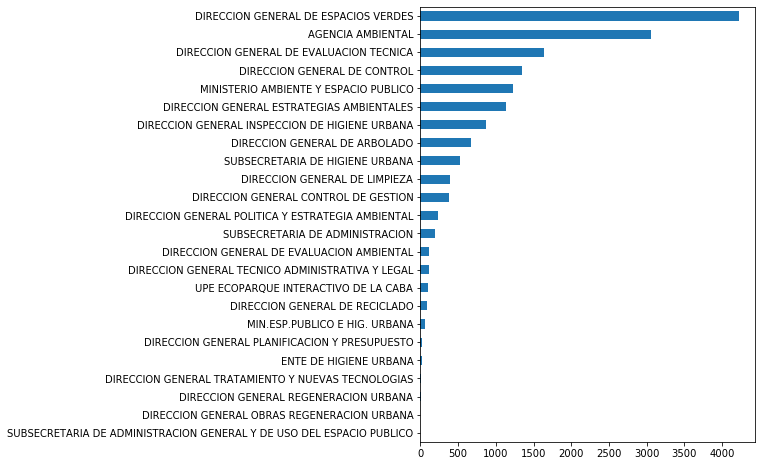

In [96]:
plt.figure(figsize=(6 ,8))
ecologia['UNIDAD_EJECUTORA'].value_counts(ascending=True).plot(kind='barh')

espacios_verdes = ecologia[ecologia['UNIDAD_EJECUTORA'] == 'DIRECCION GENERAL DE ESPACIOS VERDES']
arbolado = ecologia[ecologia['UNIDAD_EJECUTORA'] == 'DIRECCION GENERAL DE ARBOLADO']

In [97]:
espacios_verdes['PROYECTO'].value_counts()
arbolado['PROYECTO'].value_counts()

CUIDADO Y PUESTA EN VALOR DE ESPACIOS VERDES                                          3607
VALORIZACION DE LOS ESPACIOS VERDES                                                   382 
VALORIZACION DE LOS ESPACIOS VERDES DE LA CIUDAD                                      85  
OBRAS DE ESPACIOS VERDES                                                              70  
CUIDADO Y PUESTA EN VALOR DEL PATRIMONIO CULTURAL Y NATURAL DE LOS ESPACIOS VERDES    33  
CUIDADO Y PRESERVACION DEL ARBOLADO URBANO                                            24  
CUIDADO Y PUESTA EN VALOR DE GRANDES PARQUES                                          15  
OBRAS BA ELIGE EV                                                                     3   
A.CU.MAR - VALORIZACION DE LOS ESPACIOS VERDES                                        3   
PUESTA EN VALOR EDIFICIOS                                                             2   
OBRAS DE ESPACIOS VERDES II                                                           1   

ARBOLADO URBANO                               504
INTERVENCIONES SOBRE EL ARBOLADO              121
CUIDADO Y PRESERVACION DEL ARBOLADO URBANO    50 
Name: PROYECTO, dtype: int64

In [98]:
espacios_verdes['ACTIVIDAD'].value_counts()

OPERATIVOS DE CONTROL Y MANTENIMIENTO DE ESPACIOS VERDES                              516
MANTENIMIENTO DE FUENTES, MONUMENTOS Y OBRAS DE ARTE                                  494
CONDUCCION                                                                            397
JARDIN BOTANICO "CARLOS THAYS"                                                        355
PARQUE 3 DE FEBRERO                                                                   349
RESERVA ECOLOGICA COSTANERA SUR                                                       311
ADMINISTRACION Y SERVICIOS GENERALES                                                  311
VALORIZACION DE LOS ESPACIOS VERDES                                                   262
GUARDIANES DE PLAZA                                                                   261
CUIDADO Y PUESTA EN VALOR PATRIMONIO CULTURAL Y NATURAL DE LOS ESPACIOS VERDES        132
RESERVA ECOLOGICA "COSTANERA SUR"                                                     132
PARQUE AVE

In [99]:
arbolado['ACTIVIDAD'].value_counts()

MANTENIMIENTO DEL ARBOLADO URBANO POR ADMINISTRACION     180
INTERVENCIONES SOBRE EL ARBOLADO                         118
ADMINISTRACION Y SERVICIOS GENERALES                     108
CONDUCCION                                               66 
CUIDADO Y PRESERVACION DEL ARBOLADO URBANO               50 
MANTENIMIENTO DEL ARBOLADO URBANO POR TERCEROS           35 
MANTENIMIENTODEL ARBOLADO URBANO POR 3EROS               30 
DISEÑO DE PROYECTOS, OPERATIVOS Y SEGUIMIENTOS           25 
MANTENIMIENTO DEL ARBOLADO URBANO                        22 
DISEÑO DE PROYECTOS OPERATIVOS Y SEGUIMIENTOS            14 
DISEÑO DE PROYECTOS OPERATIVOS Y SEGUIMIENTO             14 
SERVICIOS POR TERCEROS                                   10 
ESTUDIOS, INVESTIGACIONES Y PROYECTOS DE FACTIBILIDAD    3  
Name: ACTIVIDAD, dtype: int64

In [100]:
ecologia['OBRA'].value_counts()

ADMINISTRACION Y SERVICIOS GENERALES                                                          3335
CONDUCCION                                                                                    3209
OPERATIVOS DE CONTROL Y MANTENIMIENTO DE ESPACIOS VERDES                                      516 
MANTENIMIENTO DE FUENTES, MONUMENTOS Y OBRAS DE ARTE                                          494 
INTERVENCIONES VETERINARIAS                                                                   453 
AUTORIDAD CUENCA MATANZA RIACHUELO                                                            416 
JARDIN BOTANICO "CARLOS THAYS"                                                                355 
PARQUE 3 DE FEBRERO                                                                           352 
UNIDAD DE AUDITORIA INTERNA                                                                   321 
DESINSECTACION - DESINFECCION - DESRATIZACION                                                 312 
RESERVA EC

In [101]:
ecologia['INCISO'].value_counts()

BIENES DE CONSUMO          5540
SERVICIOS NO PERSONALES    4647
GASTOS EN PERSONAL         3813
BIENES DE USO              2271
TRANSFERENCIAS             152 
ACTIVOS FINANCIEROS        34  
Name: INCISO, dtype: int64

In [102]:
ecologia['PARCIAL'].value_counts()

OTROS NO ESPECIFICADOS PRECEDENTEMENTE                                    1851
SUELDO ANUAL COMPLEMENTARIO                                               782 
CONTRIBUCIONES PATRONALES                                                 781 
RETRIBUCION DEL CARGO                                                     672 
COMPLEMENTOS                                                              555 
SEGUROS DE RIESGO DE TRABAJO                                              495 
CONSTRUCCIONES EN BIENES DE DOMINIO PUBLICO                               390 
UTILES DE ESCRITORIO, OFICINA Y ENSEÑANZA                                 364 
PRENDAS DE VESTIR                                                         355 
PERSONAL PERMANENTE                                                       320 
MANTENIMIENTO Y REPARACION DE MAQUINARIA Y EQUIPO                         315 
IMPRENTA, PUBLICACIONES Y REPRODUCCIONES                                  308 
PAPEL Y CARTON PARA OFICINA                         

<Figure size 1296x864 with 0 Axes>

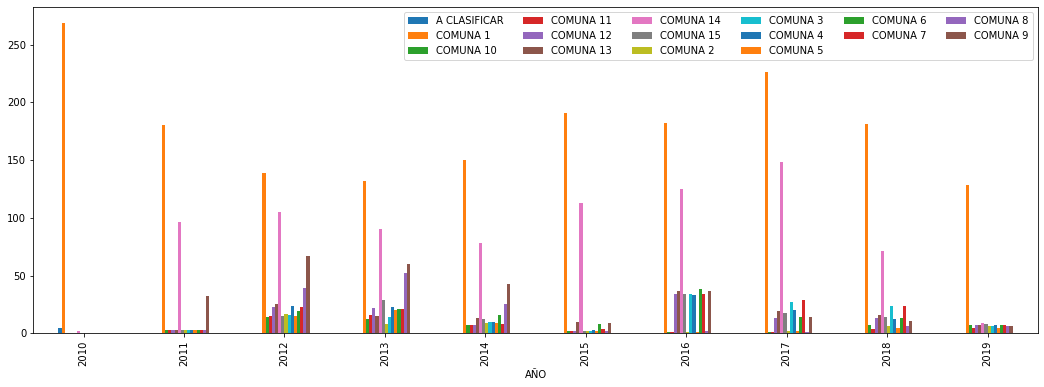

In [103]:
plt.figure(figsize=(18, 12))
aux_comunas = espacios_verdes.groupby('AÑO')['UBICACION_GEOGRAFICA'].apply(pd.Series.value_counts).unstack()

aux_comunas.plot(kind='bar', figsize=(18, 6));
plt.legend(loc="upper right", ncol=6);

In [51]:
# aux = gf.groupby('AÑO').agg({'VIGENTE': 'sum', 'DEVENGADO': 'sum', 'SANCION': 'sum', 'DEFINITIVO': 'sum'})
# aux.plot(kind='bar', figsize=(18, 6));

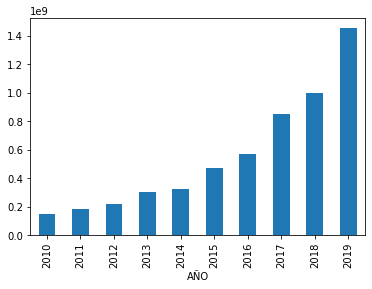

In [104]:
sancion_espacios_verdes = espacios_verdes.groupby('AÑO').agg({'SANCION': 'sum'})['SANCION']
sancion_espacios_verdes.plot(kind='bar')

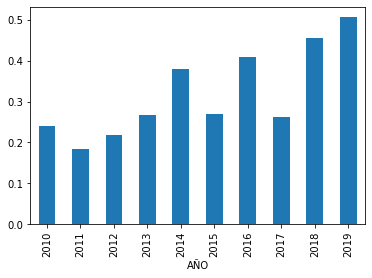

In [107]:
inflacion = pd.Series([0.239, 0.183, 0.218, 0.266, 0.38, 0.269, 0.41, 0.261, 0.455, 0.506,
#                        0.448
                      ])
inflacion.index = sancion_espacios_verdes.index
inflacion.plot(kind='bar')

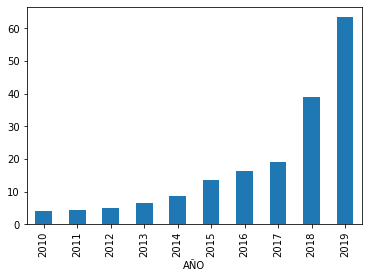

In [108]:
dolar = pd.Series([4, 4.3, 5, 6.5, 8.6, 13.4, 16.3, 19, 38.9, 63.35,
#                    83.7
                  ])
dolar.index = sancion_espacios_verdes.index
dolar.plot(kind='bar')

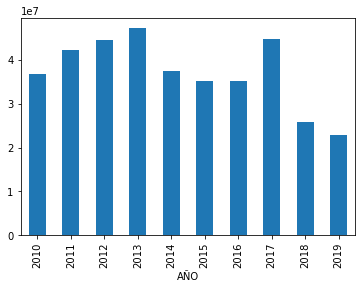

In [109]:
(sancion_espacios_verdes / dolar).plot(kind='bar')

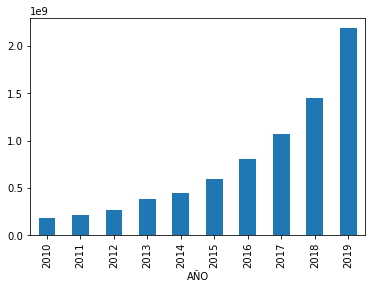

In [110]:
(sancion_espacios_verdes + sancion_espacios_verdes * inflacion).plot(kind='bar')

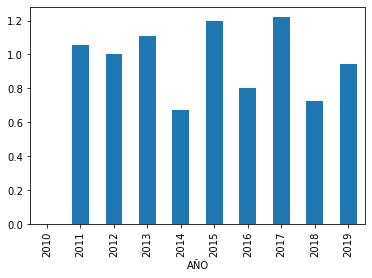

In [111]:
((sancion_espacios_verdes / sancion_espacios_verdes.shift()) - inflacion).plot(kind='bar')

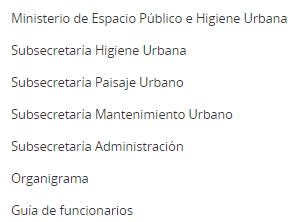

7. Conceptos en acción: Las obras en la Ciudad 103

Grandes Parques Urbanos 107

Centro de Exposiciones y Convenciones (CEC) 108

Ciudad del Rock y Teatro Polo Circo 116

Arena Parque Roca 122

Desarrollo paisajístico de la Nueva Costanera Rafael Obligado 126

Parque Costanera Norte Punta Carrasco 130

Desarrollo urbano-paisajístico Barrio Parque Donado-Holmberg 134

Villa Olímpica 138

Cuenco regulador y puesta en valor del Parque Sarmiento 148

Cuenco regulador y puesta en valor del Parque Saavedra 152

Nuevos Espacios Verdes de Proximidad 155

Plaza Monroe 156

Nueva Plaza Villa Real 160

Conectores Ambientales 165

Bulevar Roosevelt 166

Avenida Iriarte 170

Soluciones viales: Lacroze, Olazábal-Superí, Donado-Holmberg y Constituyentes 174

Parque Lineal de la Ribera del Riachuelo 182

Parque Lineal Beiró 188

Bulevar Soldado de la Frontera, Lugano I y II 192

Autopistas Verdes 196

Terrazas Verdes 199

Terrazas verdes en escuelas 200

MAMBA (Museo de Arte Moderno de Buenos Aires) 204

NIDO (Núcleo de Inclusión y Desarrollo de Oportunidades) 208

Edificio de la Comuna 12 214

Macromanzanas y Plazas Integradas 217

Prioridad Peatón - Macromanzana Área Central 218

Macromanzana - Plaza Integrada Manuel Belgrano